In [1]:
import sys
from pathlib import Path

# Add the root directory of the package (i.e., where 'core/', 'payoffs/' live)
sys.path.append(str(Path.cwd().parent))

In [2]:
from core.game import Game
from payoffs.mg import BinaryMGPayoff
from analysis.stats import compute_scaled_volatility, compute_alpha, run_game_once

import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Create and run a basic Minority Game with MG payoff
game = Game(
    num_players=1001,
    memory=12,
    num_strategies=4,
    rounds=25000,
    payoff_scheme=BinaryMGPayoff()
)

game.run()

In [16]:
points = [p.points for p in game.players]


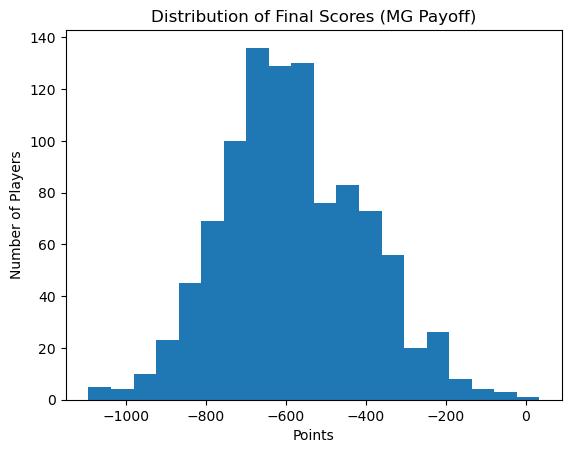

In [17]:
plt.hist(points, bins=20)
plt.title("Distribution of Final Scores (MG Payoff)")
plt.xlabel("Points")
plt.ylabel("Number of Players")
plt.show()

In [10]:
plt.hist(game.actions, bins=20)

NameError: name 'game' is not defined

In [20]:
memories = range(2, 11)
N = 101
rounds = 1000
vols = []
alphas = []

for m in memories:
    game = Game(
        num_players=N,
        memory=m,
        num_strategies=2,
        rounds=rounds,
        payoff_scheme=BinaryMGPayoff()
    )
    game.run()
    sigma2_over_N = compute_scaled_volatility(game.actions, N)
    alpha = compute_alpha(m, N)
    vols.append(sigma2_over_N)
    alphas.append(alpha)

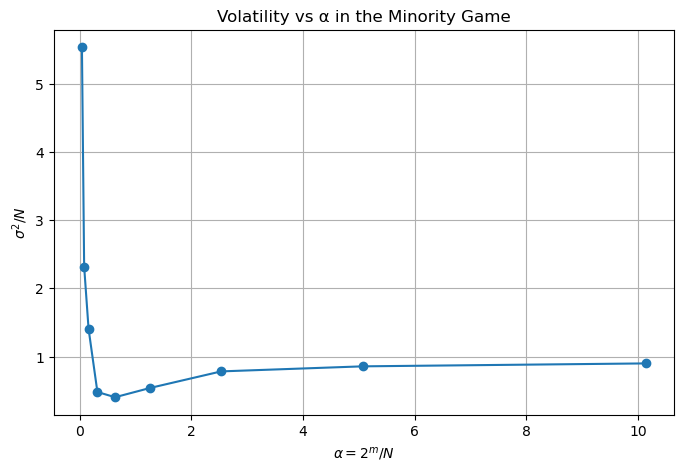

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(alphas, vols, marker='o')
plt.xlabel(r'$\alpha = 2^m / N$')
plt.ylabel(r'$\sigma^2 / N$')
plt.title('Volatility vs α in the Minority Game')
plt.grid(True)
plt.show()

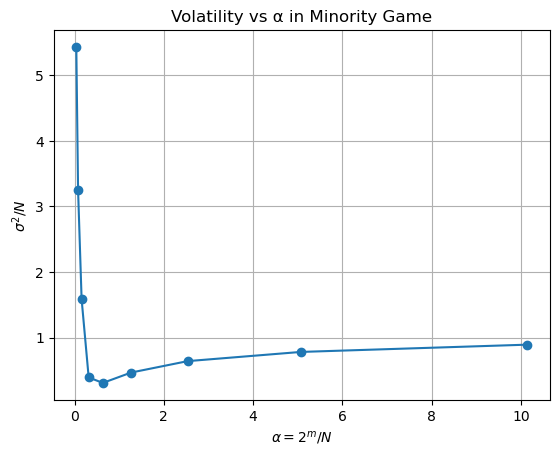

In [4]:
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt
from analysis.stats import run_game_once

alphas = []
vols = []

N = 101
s = 2
rounds = 5000
repeats = 50
memory_range = range(2, 11)

for m in memory_range:
    with Pool() as pool:
        results = pool.starmap(run_game_once, [(N, m, s, rounds) for _ in range(repeats)])
    sigma2_over_N = np.mean(results)
    alpha = 2 ** m / N
    alphas.append(alpha)
    vols.append(sigma2_over_N)

plt.plot(alphas, vols, marker='o')
plt.xlabel(r'$\alpha = 2^m / N$')
plt.ylabel(r'$\sigma^2 / N$')
plt.title('Volatility vs α in Minority Game')
plt.grid(True)
plt.show()

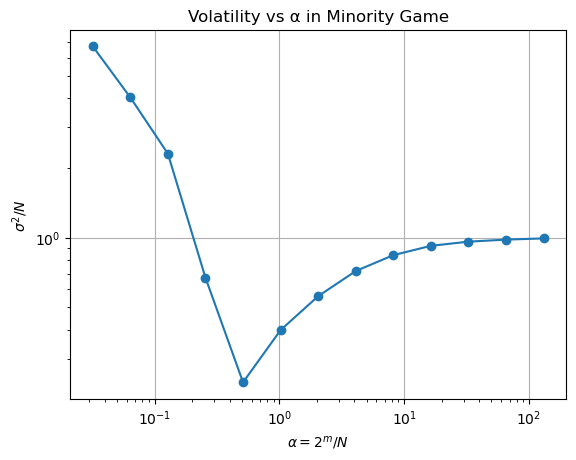

In [13]:

from analysis.stats import run_game_once

alphas = []
vols = []

N = 125
s = 2
rounds = 10000
repeats = 20
memory_range = range(2, 15)

for m in memory_range:
    with Pool() as pool:
        results = pool.starmap(run_game_once, [(N, m, s, rounds) for _ in range(repeats)])
    sigma2_over_N = np.mean(results)
    alpha = 2 ** m / N
    alphas.append(alpha)
    vols.append(sigma2_over_N)

plt.loglog(alphas, vols, marker='o')
plt.xlabel(r'$\alpha = 2^m / N$')
plt.ylabel(r'$\sigma^2 / N$')
plt.title('Volatility vs α in Minority Game')
plt.grid(True)
plt.show()

In [14]:
print(vols)

[6.707154563135999, 4.035734912432, 2.30528739872, 0.671917321632, 0.237309575872, 0.39911882519999997, 0.5590588882080001, 0.717859489616, 0.840624003264, 0.9223349000479999, 0.9613104055519999, 0.9809501953599998, 0.9929594819839999]


In [15]:
print(alphas)

[0.032, 0.064, 0.128, 0.256, 0.512, 1.024, 2.048, 4.096, 8.192, 16.384, 32.768, 65.536, 131.072]


In [23]:
A=[sum(np.random.choice([1,0], size=125) for _ in range(10000))
np.var(A)/10000

0.0

In [22]:
A


0.4994